## Image Classification Project
- Using pre-trained Convolutional Neural Network model (VGG19) for feature extraction
- Using MLPClassifier (Artificial Neural Network) for classification

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

# INPUT Layer: Input shape of the model as 224x224 pixels with a single channel (grayscale image)
input_shape = Input((224,224,1)) 

## First Convolutional block
## conv1 and conv2: Two convolutional layers with 64 filters, each with a 3x3 kernel, 
##                  and "same" padding (meaning the output size is the same as the input size). 
##                  The ReLU activation function is applied.
## pool1: A max-pooling layer that reduces the size of the feature map by a factor of 2 (224x224 -> 112x112)
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(input_shape)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

## Second Convolutional block
## Similar to the first block, but with 128 filters. The pooling layer further reduces the size to 56x56
conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

## Third Convolutional block
## This block has three convolutional layers with 256 filters, followed by a max-pooling layer that reduces the size to 28x28
conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

## Fourth Convolutional block
## This block has three convolutional layers with 512 filters, followed by a max-pooling layer that reduces the size to 14x14
conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

## Fifth Convolutional block
## This block, like the fourth, has three convolutional layers with 512 filters and a max-pooling layer that reduces the size to 7x7
conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

## Fully connected layers
## flat: Flattens the pooled feature map from the last convolutional block into a 1D vector.
## dense1 and dense2: Two fully connected layers with 4096 units each and ReLU activation.
## output: The final output layer with 1000 units (representing 1000 possible classes) and a softmax activation, providing class probabilities.
flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

## Instantiate the model
## Combines the input and output layers to define the VGG16 model structure
vgg16_model  = Model(inputs=input_shape, outputs=output)

### load_image()
* Function that loads an image from the specified path 
* Resizes it to 224x224 pixels (the input size required by VGG16) 
* Converts it to a NumPy array, adds an extra dimension to match the model's expected input shape 
* And preprocesses it for the VGG16 model 
* The preprocessed image is returned

### get_predictions()
* Function takes a pre-trained VGG16 model as input and performs the following steps:
* Creates a plot with 4 subplots (f, ax = plt.subplots(1, 4)), with a large size for visibility.
* Loads and resizes each image in imgs to 200x200 pixels using Image.open(imgs[i]).resize((200, 200))
* Displays them in the subplots using ax[i].imshow()

In [2]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 


img1 = "./test_data/cat.1.jpg"
img2 = "./test_data/dog.11900.jpg"
img3 = "./test_data/dates.jpg"
img4 = "./test_data/toyota_yaris.jpg"
#img4 = "./test_data/raspberries11.jpg"
#img4 = "./test_data/Bananas(lady_finger)3.jpg"

imgs = [img1, img2, img3, img4]

def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200)))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

* Function provided by Keras to instantiate the VGG16 model architecture, which is a popular convolutional neural network architecture used for image classification tasks
* Load pre-trained wights from ImageNet
* The _get_predictions function will then:
* 1. Load the set of images specified earlier.
* 2. Preprocess these images to be compatible with the VGG16 model.
* 3. Use the model to make predictions on these images.
* 4. Display the images and create bar plots showing the top 3 predicted classes and their associated probabilities.

### VGG16
- VGG16 is a deep convolutional neural network with 16 weight layers, developed by the Visual Geometry Group (VGG) at Oxford.
- It uses small 3x3 convolutional filters and ReLU activation functions, followed by max-pooling layers to reduce spatial dimensions.
- The model has three fully connected layers, with the final layer outputting probabilities across 1000 classes (e.g., for ImageNet).
- VGG16 has around 138 million parameters, making it computationally expensive and requiring significant processing power.
- It achieved top performance in the 2014 ImageNet competition, making it a benchmark model for image classification tasks.
- The model is widely used for transfer learning, where pre-trained weights are adapted for other tasks in computer vision.
- While highly accurate, VGG16’s large model size and computational demands are considered its primary drawbacks.

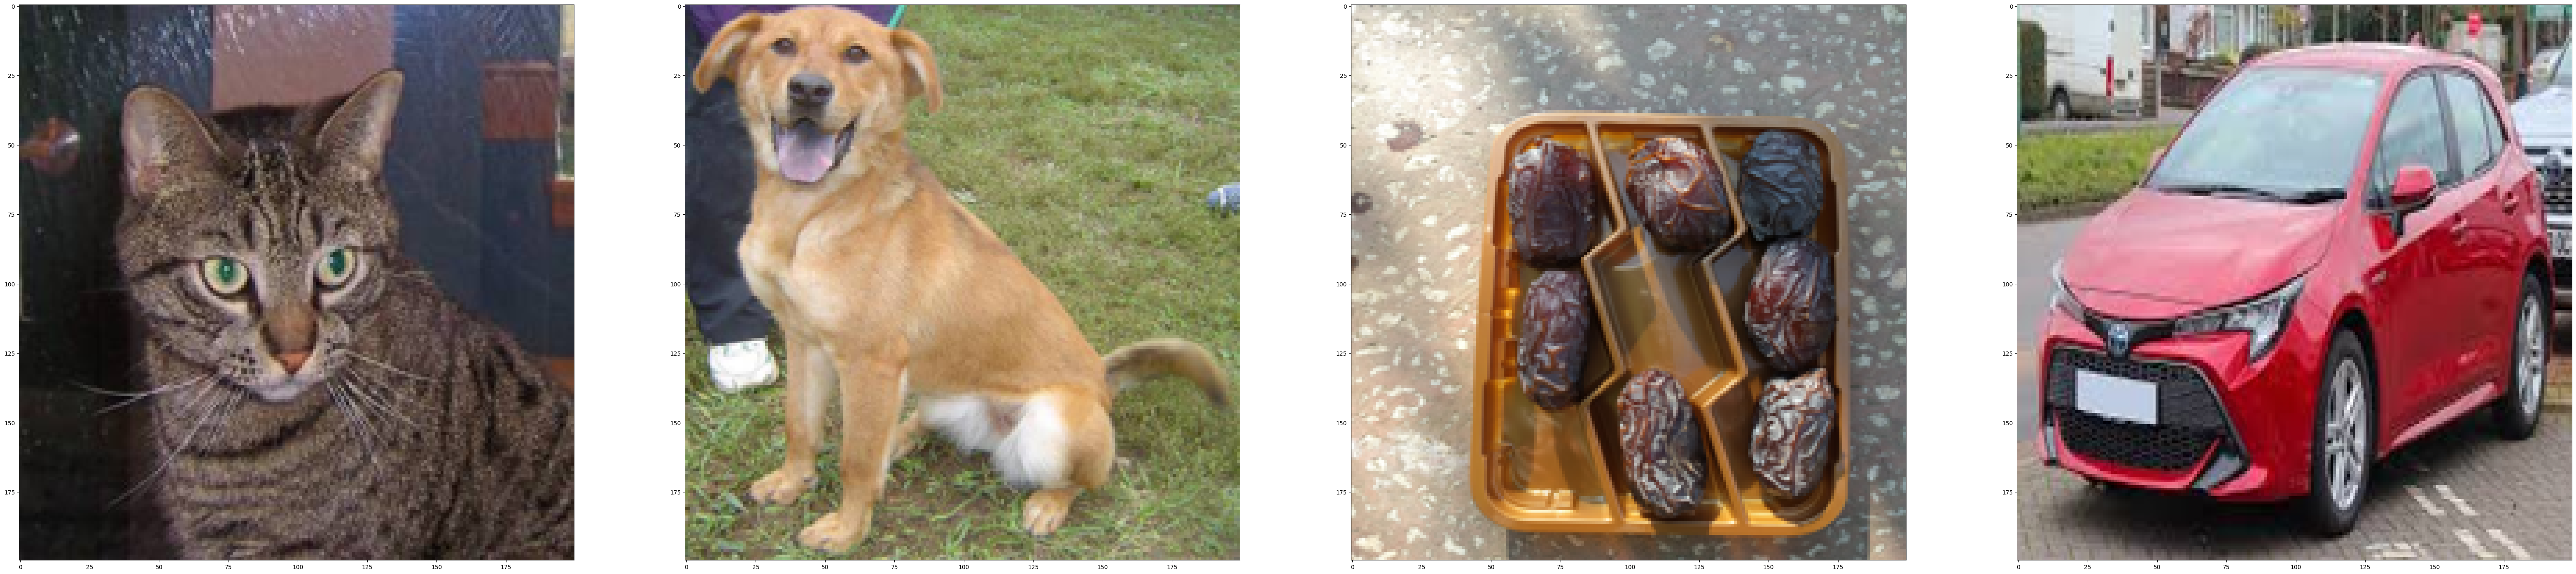

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


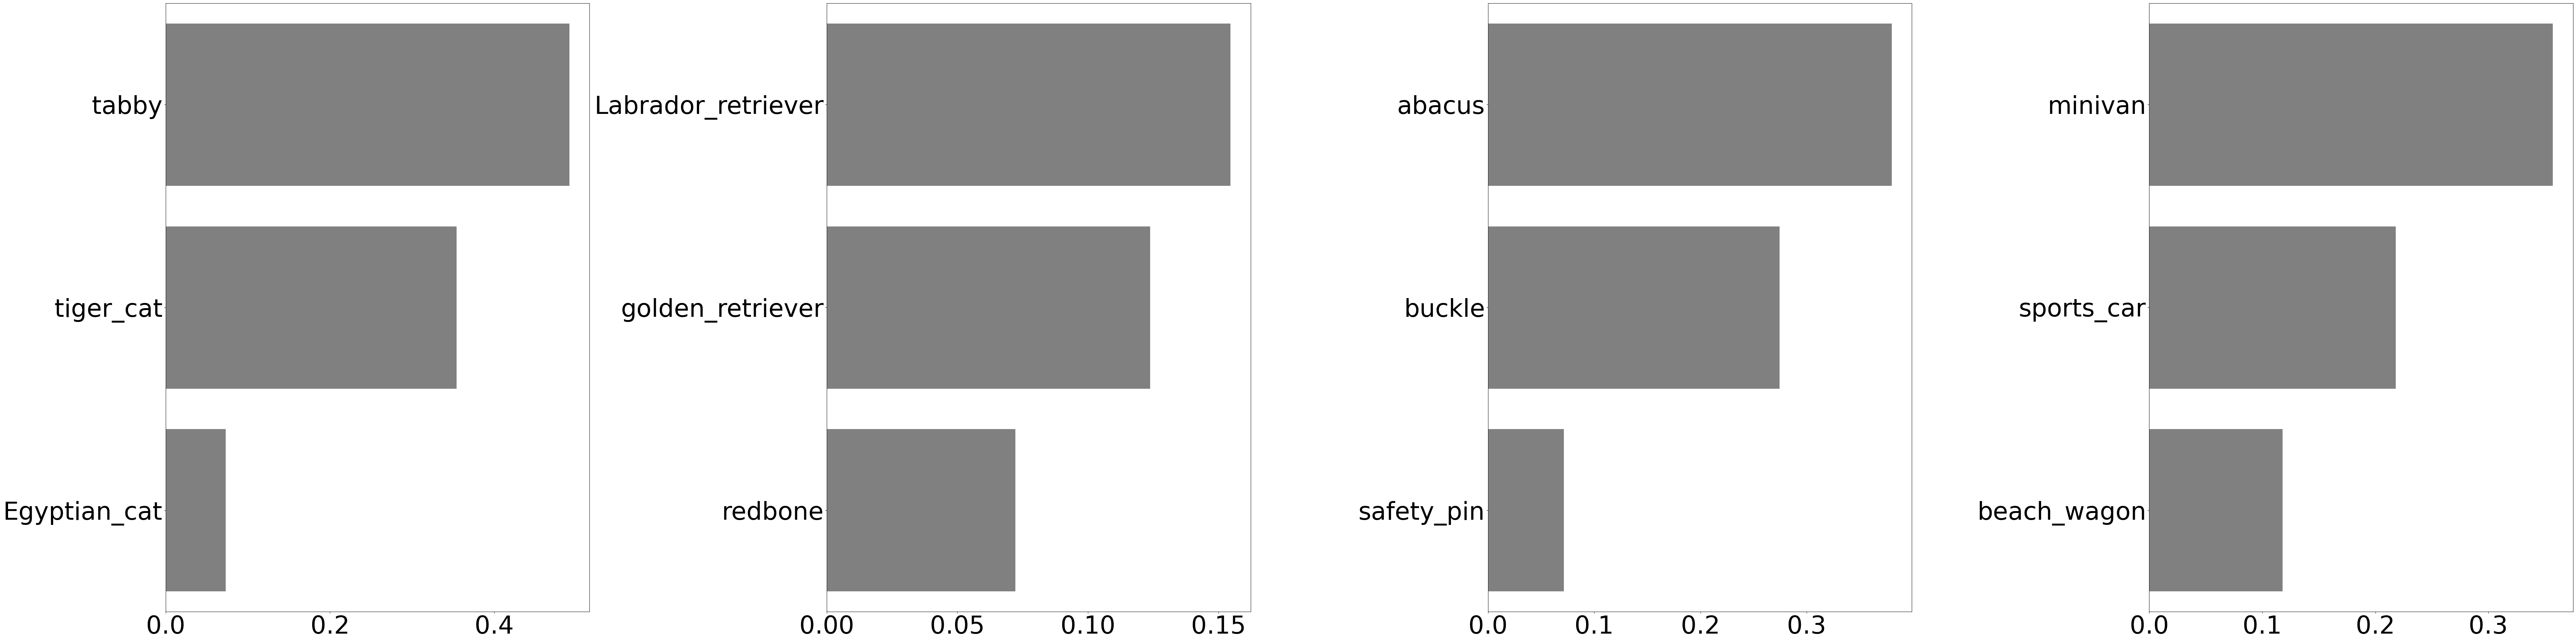

In [3]:
from keras.applications.vgg16 import VGG16

## vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'

## Load the VGG16 model with pre-trained weights from ImageNet
vgg16_model = VGG16(weights='imagenet')
get_predictions(vgg16_model)

## VGG19
- VGG19 is a deep convolutional neural network with 19 weight layers, extending the VGG16 architecture.
- It includes 16 convolutional layers with small 3x3 filters, followed by 3 fully connected layers.
- The model uses max-pooling layers to reduce the spatial dimensions of feature maps and manage computational complexity.
- ReLU activation functions are applied throughout the network to introduce non-linearity.
- VGG19 has more parameters than VGG16, making it computationally heavier and requiring more memory.
- It is primarily used for tasks like image classification, feature extraction, and as a backbone for more complex models.
- VGG19, like VGG16, is a popular choice for transfer learning and other computer vision applications.

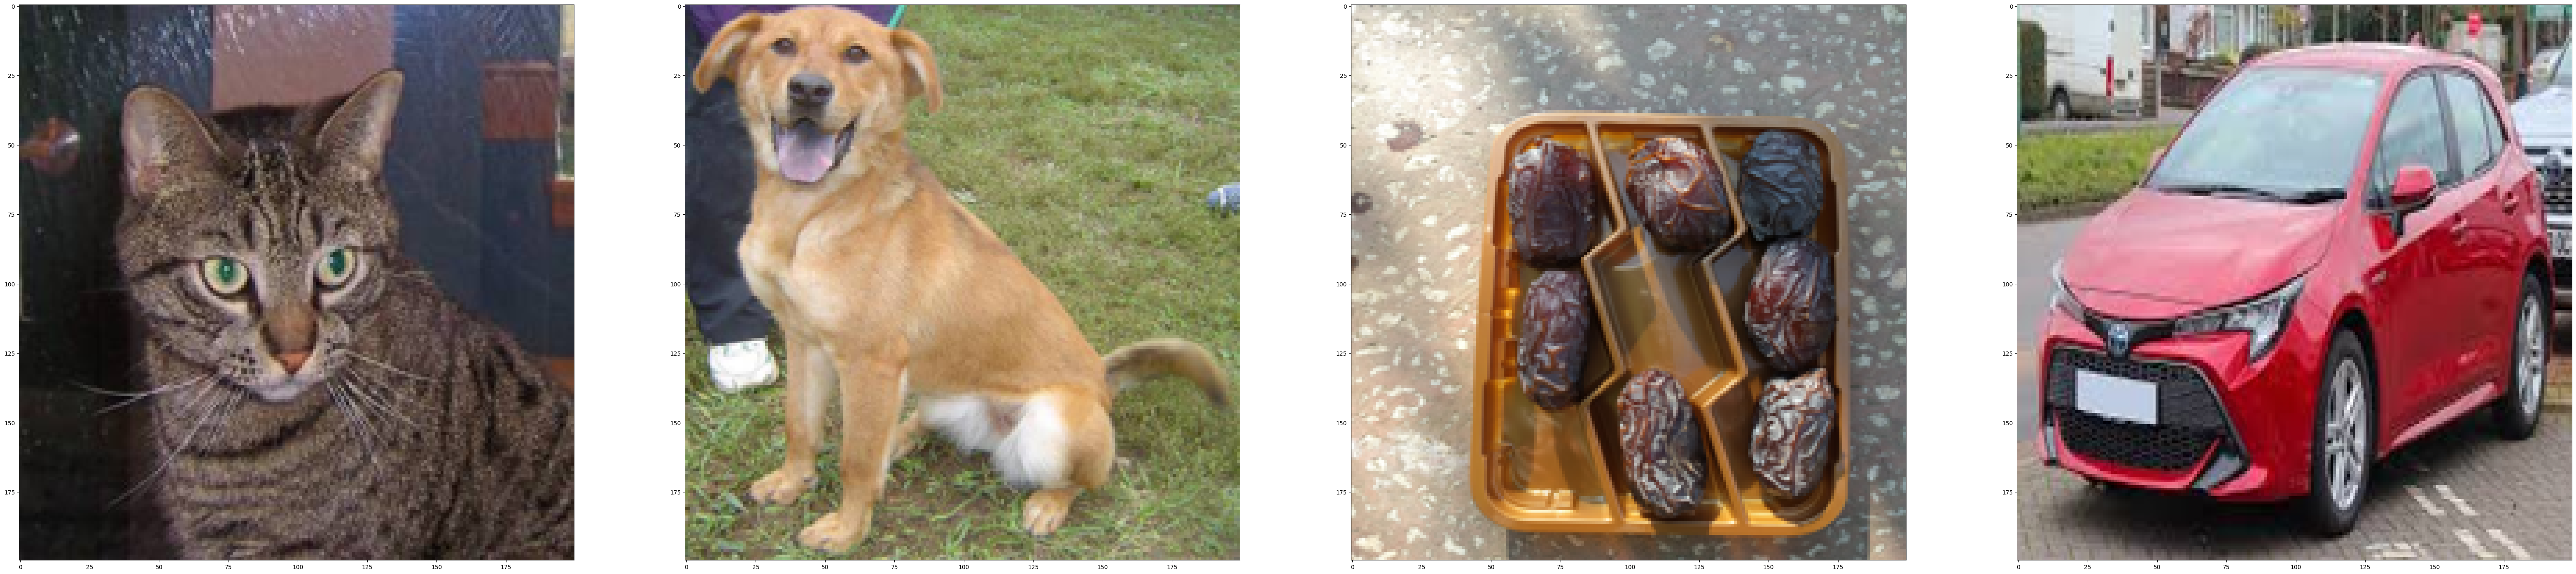

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


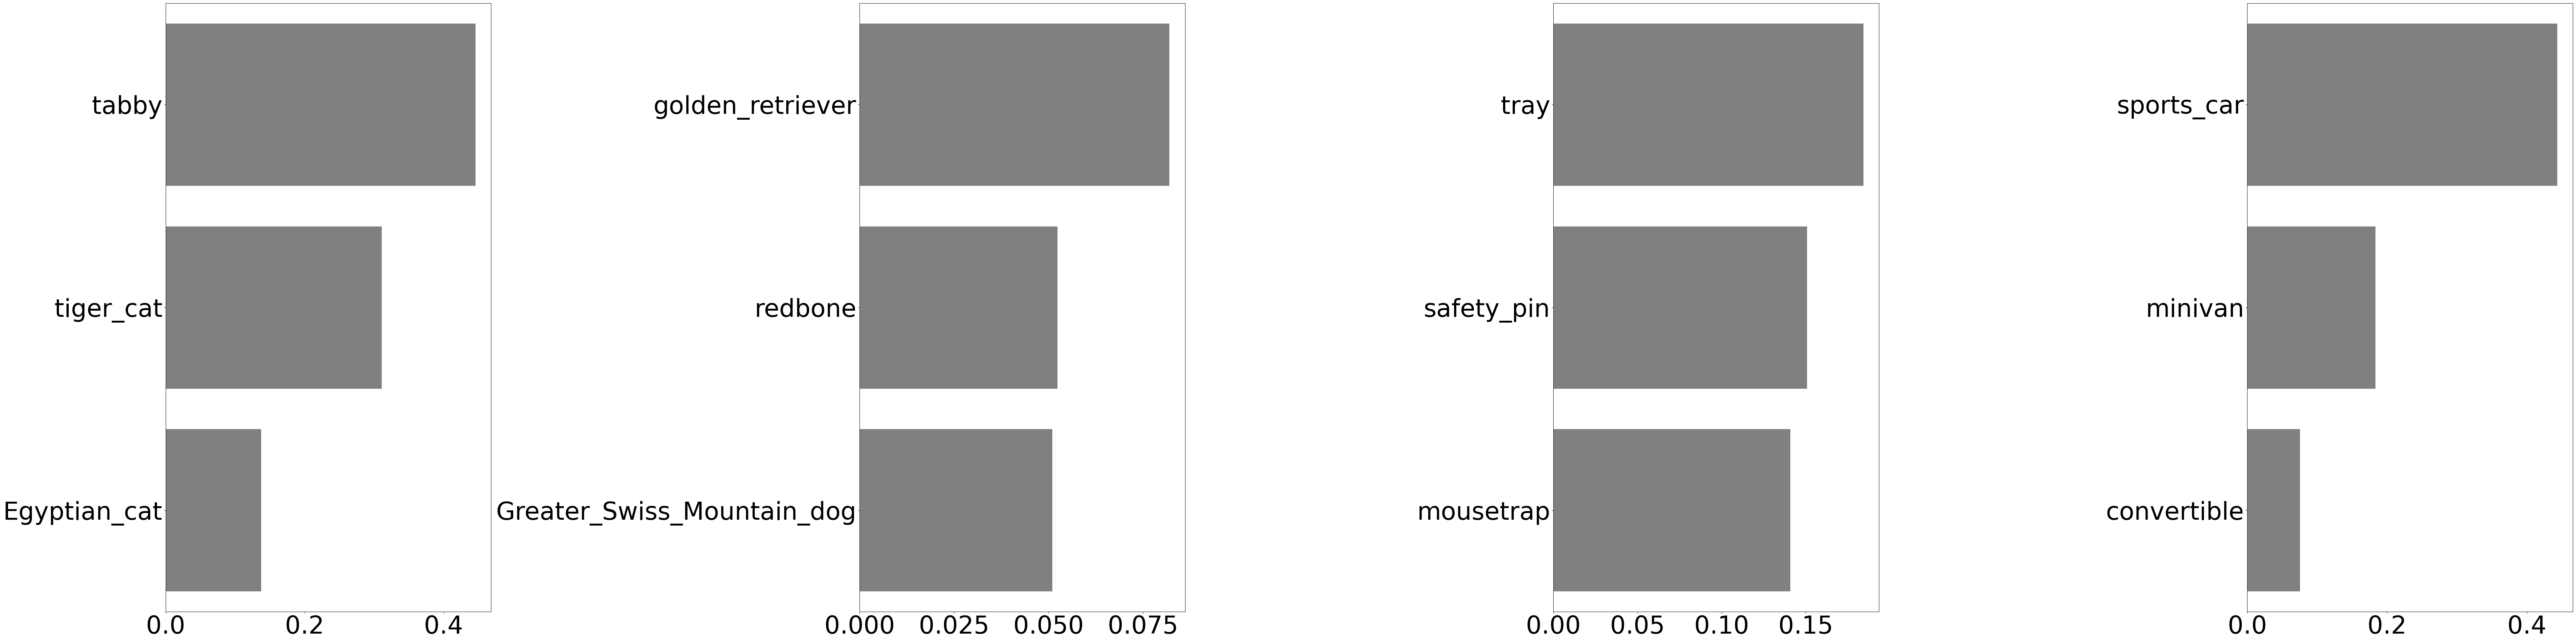

In [4]:
from keras.applications.vgg19 import VGG19

## Load the VGG16 model with pre-trained weights from ImageNet
vgg19_model = VGG19(weights='imagenet')
get_predictions(vgg19_model)

## Image feature extraction using Pre-trained model
- Use pre-trained models for feature extraction 
- The extracted features can be used for Machine Learning purposes

In [5]:
## "include_top = False", which states that we do not want to add the last layer of this architecture
vgg19Model = VGG19(weights='imagenet', include_top=False)

In [6]:
vgg19Model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.applications.vgg19 import preprocess_input

def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg19_features = vgg19Model.predict(img_data)
    return vgg19_features

img_path = "./test_data/dog.11900.jpg"  ## Test an image and probe it's features
vgg19_features = get_features(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


In [8]:
vgg19_features

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          10.674561  ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          11.660336  ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          14.498546  ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           9.67941   ,  0.        ]],

        [[ 0.        ,  0.        , 26.572016  , ...,  0.        ,
           0.        , 21.553076  ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , 17.321888  ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [9]:
vgg19_features.flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [10]:
vgg19_features.squeeze()

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         10.674561  ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         11.660336  ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         14.498546  ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          9.67941   ,  0.        ]],

       [[ 0.        ,  0.        , 26.572016  , ...,  0.        ,
          0.        , 21.553076  ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , 17.321888  ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [11]:
print(f"Flatten : {vgg19_features.flatten().shape}")
print(f"Squeeze : {vgg19_features.squeeze().shape}") # vgg19_features.squeeze().shape

Flatten : (25088,)
Squeeze : (7, 7, 512)


## Transfer Learning using pre-trained model features. Steps to implementing
- Image feature extraction
- Training a classifier

In [12]:
## Loop through the whole Fruits Training dataset and store it to a dictionary
import os

# Location of the Training dataset
#data_path = "../datasets/fruits-360_dataset/Training/"
data_path = "../datasets/fruits-360_dataset/Training_Xsmall/"

# Dictionary to store subfolder names and image files
fruit_images = {}

# Walk through the directory
for root, dirs, files in os.walk(data_path):
    # Get the relative path of the current directory
    relative_path = os.path.relpath(root, data_path)
    
    # Skip the root directory
    if relative_path == '.':
        continue
    
    # Store the subfolder name as the key and initialize an empty list for image files
    fruit_images[relative_path] = []
    
    # Add all image files in the current directory to the list
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            fruit_images[relative_path].append(file)
    

In [13]:
fruit_images

{'Apple Braeburn': ['0_100.jpg',
  '100_100.jpg',
  '101_100.jpg',
  '102_100.jpg',
  '103_100.jpg',
  '104_100.jpg',
  '105_100.jpg',
  '106_100.jpg',
  '107_100.jpg',
  '108_100.jpg',
  '109_100.jpg',
  '10_100.jpg',
  '110_100.jpg',
  '111_100.jpg',
  '112_100.jpg',
  '113_100.jpg',
  '114_100.jpg',
  '115_100.jpg',
  '116_100.jpg',
  '117_100.jpg',
  '118_100.jpg',
  '119_100.jpg',
  '11_100.jpg',
  '120_100.jpg',
  '121_100.jpg',
  '122_100.jpg',
  '123_100.jpg',
  '124_100.jpg',
  '125_100.jpg',
  '126_100.jpg',
  '127_100.jpg',
  '128_100.jpg',
  '129_100.jpg',
  '12_100.jpg',
  '130_100.jpg',
  '131_100.jpg',
  '132_100.jpg',
  '133_100.jpg',
  '134_100.jpg',
  '135_100.jpg',
  '136_100.jpg',
  '137_100.jpg',
  '138_100.jpg',
  '139_100.jpg',
  '13_100.jpg',
  '140_100.jpg',
  '141_100.jpg',
  '142_100.jpg',
  '143_100.jpg',
  '144_100.jpg',
  '145_100.jpg',
  '146_100.jpg',
  '147_100.jpg',
  '148_100.jpg',
  '149_100.jpg',
  '14_100.jpg',
  '150_100.jpg',
  '151_100.jpg',
  '

In [14]:
# Print the resulting dictionary
for fruit, images in fruit_images.items():
    print(f"{fruit}: {len(images)} images")
    #Print the first few image paths
    print(f"Sample image paths:")
    for path in images[:3]:  # Print first 3 paths
        print(f"  {path}")
    print()    


Apple Braeburn: 492 images
Sample image paths:
  0_100.jpg
  100_100.jpg
  101_100.jpg

Apple Golden 1: 480 images
Sample image paths:
  0_100.jpg
  10_100.jpg
  11_100.jpg

Apple Golden 2: 492 images
Sample image paths:
  0_100.jpg
  100_100.jpg
  101_100.jpg

Apple Golden 3: 481 images
Sample image paths:
  0_100.jpg
  100_100.jpg
  101_100.jpg

Apple Red Delicious: 490 images
Sample image paths:
  100_100.jpg
  101_100.jpg
  102_100.jpg



### Parse through the "fruit_images" dictionary and get the features for each image and store them in the "features" dictionary

In [15]:
## Get the features from the images and store it in a dictionary
features = {}

## Init features dictionary
for fruit in fruit_images.keys():
    features[fruit] = []

for fruit, images in fruit_images.items():
        for i in range(len(images)): 
            img_path = data_path + fruit + "/" + images[i]
            #img_path = data_path + fruit + "/" + images
            feats = get_features(img_path)
            features[fruit].append(feats.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
features

{'Apple Braeburn': [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  array([0., 0., 0., ..., 0., 0., 0.], dtype=fl

## Convert the features extracted stored in SET into Data Frame
- Parse through the features items and convert them to Data Frame

In [17]:
## Convert the features from SET to DataFrame
dataset = pd.DataFrame()
for label, feats in features.items():
    temp_df = pd.DataFrame(feats)
    temp_df['img_label'] = label
    dataset = pd.concat([dataset, temp_df], ignore_index=True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,img_label
0,0.0,0.0,0.0,0.0,2.516251,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Apple Braeburn
1,0.0,0.0,0.0,0.0,0.453813,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.250165,0.0,0.0,0.0,0.0,0.0,Apple Braeburn
2,0.0,0.0,0.0,0.0,0.742638,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Apple Braeburn
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.693424,0.0,0.0,0.0,0.0,0.0,Apple Braeburn
4,0.0,0.0,0.0,0.0,0.445520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.943483,0.0,0.0,0.0,0.0,0.0,Apple Braeburn


In [18]:
dataset["img_label"].value_counts()

img_label
Apple Braeburn         492
Apple Golden 2         492
Apple Red Delicious    490
Apple Golden 3         481
Apple Golden 1         480
Name: count, dtype: int64

In [19]:
## Encode the "img_label" since MLPClassifier cannot handle string
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()  ## use encoder.classes_ to get the mapping

# Encode the last column of X
dataset["img_label_encoded"] = encoder.fit_transform(dataset["img_label"])
#dataset = dataset.drop(["img_label"], axis=1)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,25080,25081,25082,25083,25084,25085,25086,25087,img_label,img_label_encoded
0,0.0,0.0,0.0,0.0,2.516251,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Apple Braeburn,0
1,0.0,0.0,0.0,0.0,0.453813,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.250165,0.0,0.0,0.0,0.0,0.0,Apple Braeburn,0
2,0.0,0.0,0.0,0.0,0.742638,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Apple Braeburn,0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693424,0.0,0.0,0.0,0.0,0.0,Apple Braeburn,0
4,0.0,0.0,0.0,0.0,0.445520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.943483,0.0,0.0,0.0,0.0,0.0,Apple Braeburn,0


In [20]:
# Create the mapping dictionary, we will use it later for prediction
label_mapping = dict(zip(dataset['img_label_encoded'], dataset['img_label']))
label_mapping

{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Red Delicious'}

In [21]:
## Retrieve the class name from the encoded value
encoder.classes_[0]

'Apple Braeburn'

In [22]:
## Split the data to X and y
X = dataset[dataset.img_label != "test"].drop(['img_label', 'img_label_encoded'], axis=1)
y = dataset[dataset.img_label != "test"].img_label_encoded

In [23]:
print(X.shape)
print(y.shape)

(2435, 25088)
(2435,)


In [24]:
y.value_counts()

img_label_encoded
0    492
2    492
4    490
3    481
1    480
Name: count, dtype: int64

## Create a model classifier to predict classes, using SKLEARN MLPClassifier
- VarianceThreshold: A feature selection method that removes all features with low variance. Features with low variance (i.e., very little change across samples) are often less informative and can be removed to simplify the model.VarianceThreshold() is a feature selection object that removes all low-variance features. By default, VarianceThreshold() removes all zero-variance features, i.e., features that have the same value in all samples. This corresponds to a variance threshold of 0.0.

- MLPClassifier: A multi-layer perceptron (MLP) is a type of artificial neural network used for classification. It can learn complex patterns in data by adjusting weights during training.

- Pipeline: A pipeline chains multiple steps together (e.g., preprocessing and model training) into a single workflow. This ensures that the same preprocessing is applied to both training and testing data, and simplifies the process of applying a sequence of transformations and estimators.

In [25]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pickle
import joblib

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MLPClassifier
model = MLPClassifier(max_iter=1000)
#model = MLPClassifier(hidden_layer_sizes=(100, 10))
#pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 10), (150, 20)],  # Example values
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive']  # Learning rate strategies
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Compute accuracy on the test set using the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters: ", grid_search.best_params_)

#pipeline.fit(X, y)
#pipeline.fit(X_train, y_train)

## Compute accuracy
#accuracy = pipeline.score(X_test, y_test)
#print ("Accuracy: ", accuracy)

#print ("Model Trained on pre-trained features")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Accuracy:  1.0
Best Hyperparameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [44]:
best_model

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

## Create test dataset from sample image

In [32]:
## Create test dataset
#img5 = "./test_data/apple_red_deli_r_323_100.jpg"
img5 = "./test_data/AppleRedDelicious.png"
#img5 = "./test_data/Bunch-of-bananas.jpg"
#img5 = "./test_data/banana_single.jpg"
#img5 = "./test_data/apple_gold3_0_100.jpg"
testData = {}
testData['test'] = []
feats = get_features(img5)
testData['test'].append(feats.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [33]:
feats.flatten().shape

(25088,)

In [34]:
testData['test']

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [35]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
2112,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.529642,0.0,0.0,0.0,0.0,0.0
973,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.590103,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,0.0,4.047232,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
979,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.179991,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.157723,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.0,0.0,0.0,0.0,2.834104,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.445767,0.0,0.0,0.0,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.236747,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.424659,0.0,0.0,0.0,0.0,0.0
1109,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.913827,0.0,0.0,0.0,0.0,0.0
184,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
testData['test']

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

## Prediction using MLPClassifier

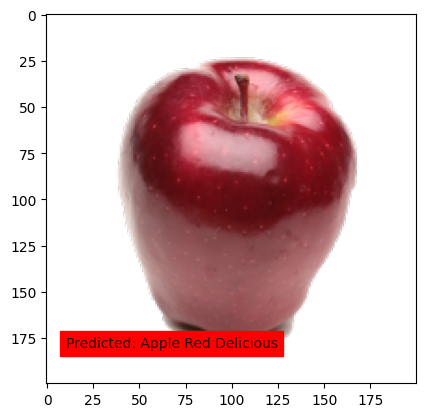

In [45]:
#preds = pipeline.predict(testData['test'])
preds = best_model.predict(testData['test'])

# Single image in testData and a single prediction in preds
test_image = Image.open(img5).resize((200, 200))
predicted_label = label_mapping[preds[0]]  # Get the predicted label from the mapping

# Plotting the image
f, ax = plt.subplots(1, 1)  # Create a single subplot
ax.imshow(test_image)
ax.text(10, 180, f'Predicted: {predicted_label}', color='k', backgroundcolor='red', alpha=0.8)  # Display predicted label
plt.show()


## Multiple test data/images
#f, ax = plt.subplots(1, 2)
#for i in range(2):
#    ax[i].imshow(Image.open(testData[i]).resize((200, 200)))
#    predicted_label = label_mapping[preds[i]]
#    ax[i].text(10, 180, 'Predicted: %s' % {predicted_label}, color='k', backgroundcolor='red', alpha=0.8)
#plt.show()

In [41]:
preds

array([4])

In [43]:
## Save the model
#pickle.dump(pipeline, open('model.h5', 'wb'))
joblib.dump((best_model, encoder), 'model_with_labelEncoder2.joblib')

['model_with_labelEncoder2.joblib']